In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### Importing Required Libraries
In this section, we import all the necessary Python libraries for natural language processing, data handling, and machine learning. Key libraries include:
- `pandas` for data manipulation.
- `numpy` for numerical computations.
- `scikit-learn` for model training and evaluation.
- Additional libraries for NLP tasks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
from datasets import Dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification

### Loading the Dataset
Here, we load the dataset using `pandas.read_csv`. The dataset contains labeled text data related to skin text classification. The following steps involve inspecting the data for its structure and features.

In [3]:
df = pd.read_csv('/content/Skin_text_classifier.csv')
df.head()

,Disease name,Text
0,Vitiligo,"""I've had these light patches on my neck and f..."
1,Scabies,"""Doctor, I've noticed these small, red bumps o..."
2,Vitiligo,"""Doctor, I noticed a pale patch around my knee..."
3,Hives (Urticaria),"Hives, also known as urticaria, typically pres..."
4,Folliculitis,"""I have these small, hard bumps on my buttocks..."


### Performing Exploratory Data Analysis(EDA)

In [4]:
print("Number of Observations:", df.shape[0])
print("Number of Unique Skin Diseases:", df['Disease name'].nunique())
print("Disease Distribution:\n", df['Disease name'].value_counts())

Number of Observations: 143
Number of Unique Skin Diseases: 13
Disease Distribution:
 Disease name
Vitiligo                        11
Scabies                         11
Hives (Urticaria)               11
Folliculitis                    11
Eczema                          11
Ringworm (Tinea Corporis)       11
Athlete's Foot (Tinea Pedis)    11
Rosacea                         11
Psoriasis                       11
Shingles (Herpes Zoster)        11
Impetigo                        11
Contact Dermatitis              11
Acne                            11
Name: count, dtype: int64


In [5]:
df['Text Length'] = df['Text'].apply(lambda x: len(str(x).split()))
print("Average Description Length:", df['Text Length'].mean())

Average Description Length: 38.27272727272727


In [6]:
df['Text length'] = df['Text'].apply(len)
print(df[['Text length', 'Disease name']].groupby(['Disease name']).describe())

                             Text length                                 \
                                   count        mean         std    min   
Disease name                                                              
Acne                                11.0  289.363636  140.511404  182.0   
Athlete's Foot (Tinea Pedis)        11.0  206.090909  147.305434  128.0   
Contact Dermatitis                  11.0  203.636364  155.918743  118.0   
Eczema                              11.0  201.909091  173.501847  134.0   
Folliculitis                        11.0  197.000000  159.715372  130.0   
Hives (Urticaria)                   11.0  196.090909  146.584757   89.0   
Impetigo                            11.0  200.090909  142.359724  128.0   
Psoriasis                           11.0  199.727273  163.726657  130.0   
Ringworm (Tinea Corporis)           11.0  207.909091  162.043485  128.0   
Rosacea                             11.0  259.727273  160.977695  171.0   
Scabies                  

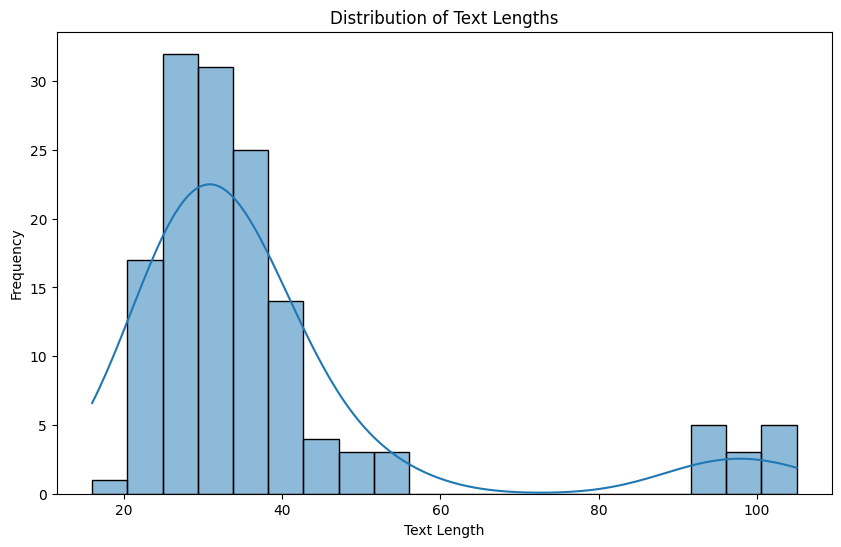

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Text Length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

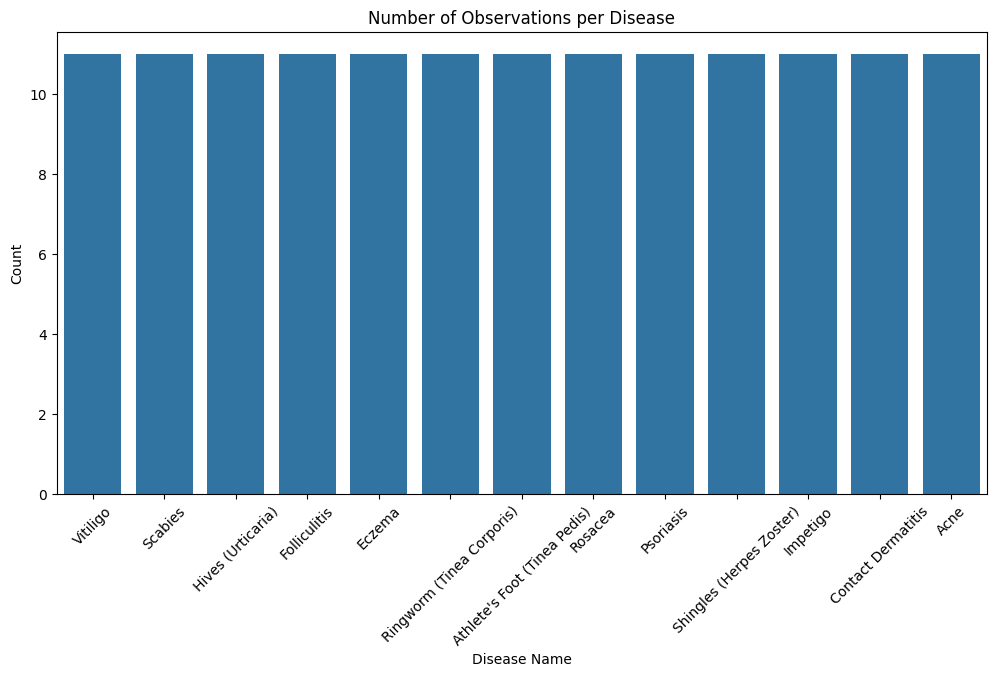

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Disease name'].value_counts().index, y=df['Disease name'].value_counts().values)
plt.title("Number of Observations per Disease")
plt.xlabel("Disease Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Text Vectorization using TF-IDF

In [9]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df['Text'])

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Disease name'])
class_labels = label_encoder.classes_

### Splitting the Data into Training and Testing Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Machine Learning Multinomial Naive Bayes Model

In [12]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

### Training the Machine Learning Logistic Regression Model 

In [13]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

Naive Bayes Accuracy: 0.3793103448275862
Logistic Regression Accuracy: 0.4827586206896552
Naive Bayes Classification Report:
                              precision    recall  f1-score   support

                        Acne       1.00      0.50      0.67         2
Athlete's Foot (Tinea Pedis)       0.00      0.00      0.00         4
          Contact Dermatitis       1.00      0.50      0.67         4
                      Eczema       0.00      0.00      0.00         1
                Folliculitis       0.67      1.00      0.80         2
           Hives (Urticaria)       0.00      0.00      0.00         3
                    Impetigo       1.00      0.67      0.80         3
                   Psoriasis       1.00      0.33      0.50         3
   Ringworm (Tinea Corporis)       0.00      0.00      0.00         0
                     Rosacea       1.00      1.00      1.00         2
                     Scabies       0.00      0.00      0.00         3
    Shingles (Herpes Zoster)      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

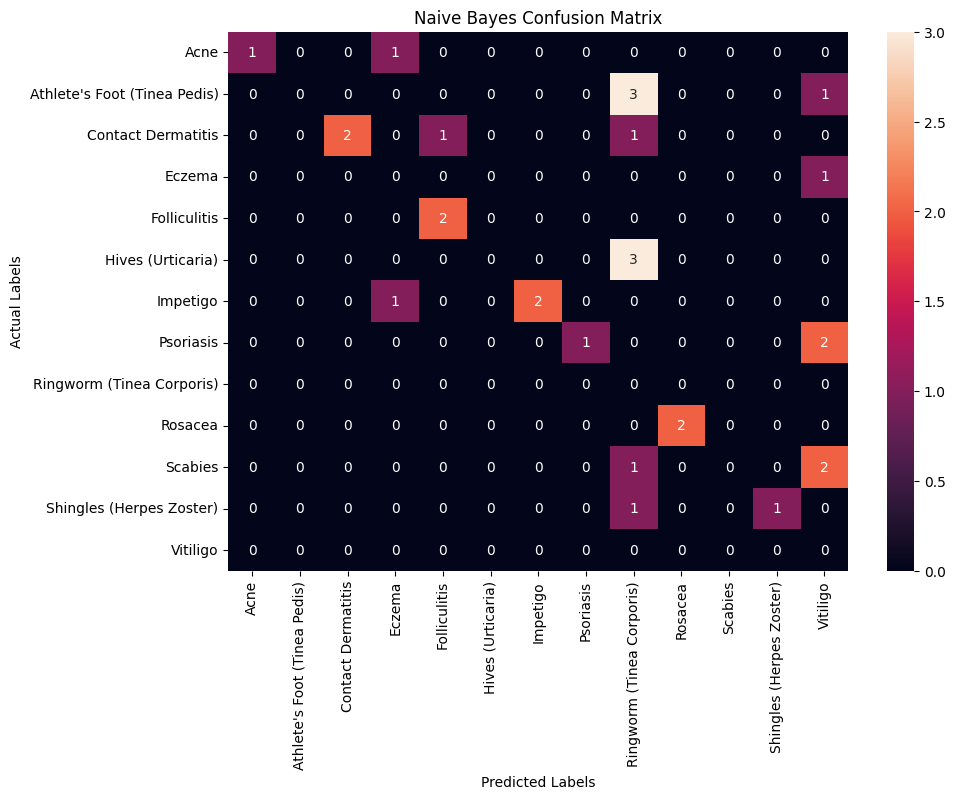

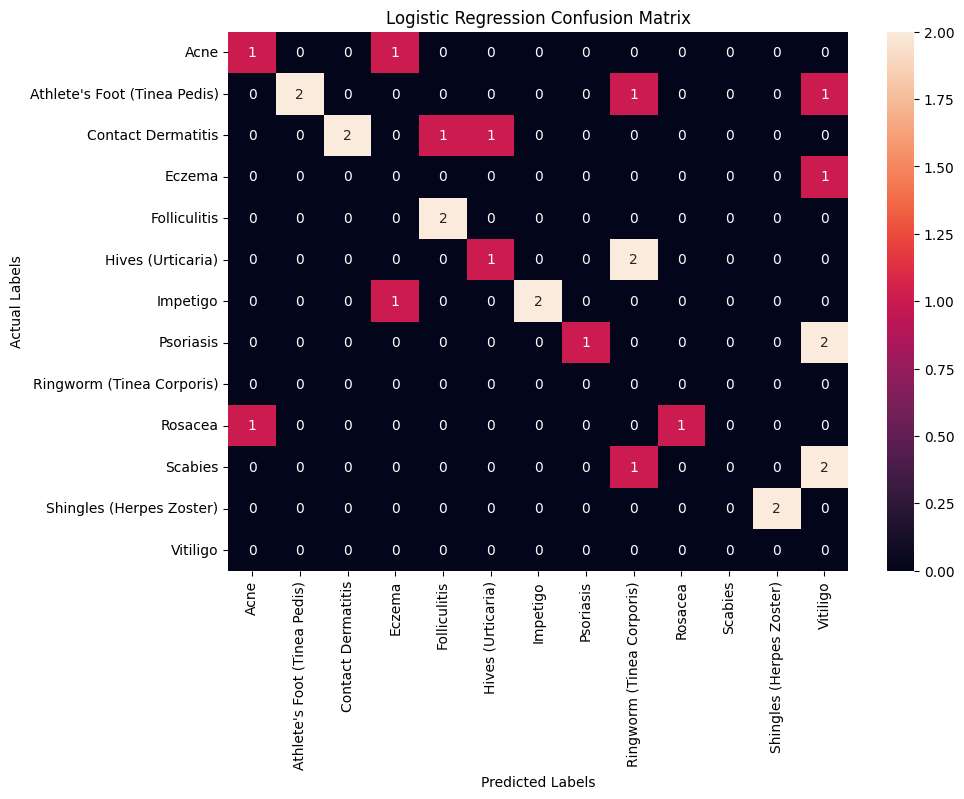

In [ ]:

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=class_labels))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=class_labels))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10,7))
sns.heatmap(cm_nb, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10,7))
sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Imported Natural Language ToolKit

In [15]:
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet

### Applying the Data Augmentation technique to the original dataset

In [16]:
# file_path = "/content/Skin_Text_Classifier.csv"
# dataset = pd.read_csv(file_path)

# def synonym_replacement(text):
#     words = text.split()
#     new_words = []
#     for word in words:
#         synonyms = wordnet.synsets(word)
#         if synonyms:
#             synonym_list = [lemma.name() for synonym in synonyms for lemma in synonym.lemmas()]
#             synonym_list = list(set(synonym_list))
#             if synonym_list:
#                 new_words.append(random.choice(synonym_list))
#             else:
#                 new_words.append(word)
#         else:
#             new_words.append(word)
#     return " ".join(new_words)

# expanded_data = []

# for _, row in dataset.iterrows():
#     original_text = row['Text']
#     disease = row['Disease name']

#     synonym_text = synonym_replacement(original_text)
#     # back_translated_text = back_translation(original_text, mid_lang="es")

#     expanded_data.append({'Disease name': disease, 'Text': original_text})
#     expanded_data.append({'Disease name': disease, 'Text': synonym_text})
#     # expanded_data.append({'Disease name': disease, 'Text': back_translated_text})

# expanded_dataset = pd.DataFrame(expanded_data)

# output_path = "expanded_dataset_no_back_translation.csv"
# expanded_dataset.to_csv(output_path, index=False)

### Loading the Augmented Dataset

In [17]:
df1 = pd.read_csv('expanded_dataset_no_back_translation.csv')
print("Number of Observations:", df1.shape[0])
print("Number of Unique Skin Diseases:", df1['Disease name'].nunique())
print("Disease Distribution:\n", df1['Disease name'].value_counts())


Number of Observations: 858
Number of Unique Skin Diseases: 13
Disease Distribution:
 Disease name
Vitiligo                        66
Scabies                         66
Hives (Urticaria)               66
Folliculitis                    66
Eczema                          66
Ringworm (Tinea Corporis)       66
Athlete's Foot (Tinea Pedis)    66
Rosacea                         66
Psoriasis                       66
Shingles (Herpes Zoster)        66
Impetigo                        66
Contact Dermatitis              66
Acne                            66
Name: count, dtype: int64


In [18]:
df1['Text Length'] = df1['Text'].apply(lambda x: len(str(x).split()))
print("Average Description Length:", df1['Text Length'].mean())

Average Description Length: 41.81351981351981


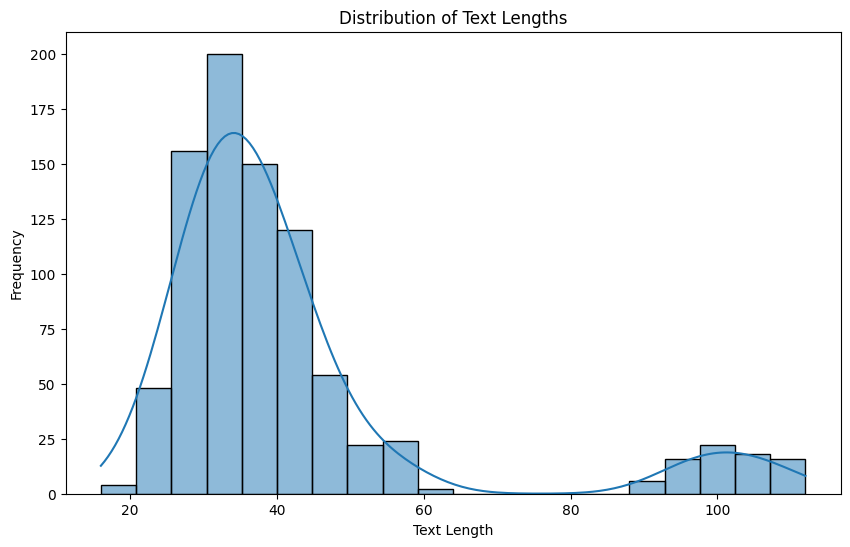

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Text Length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

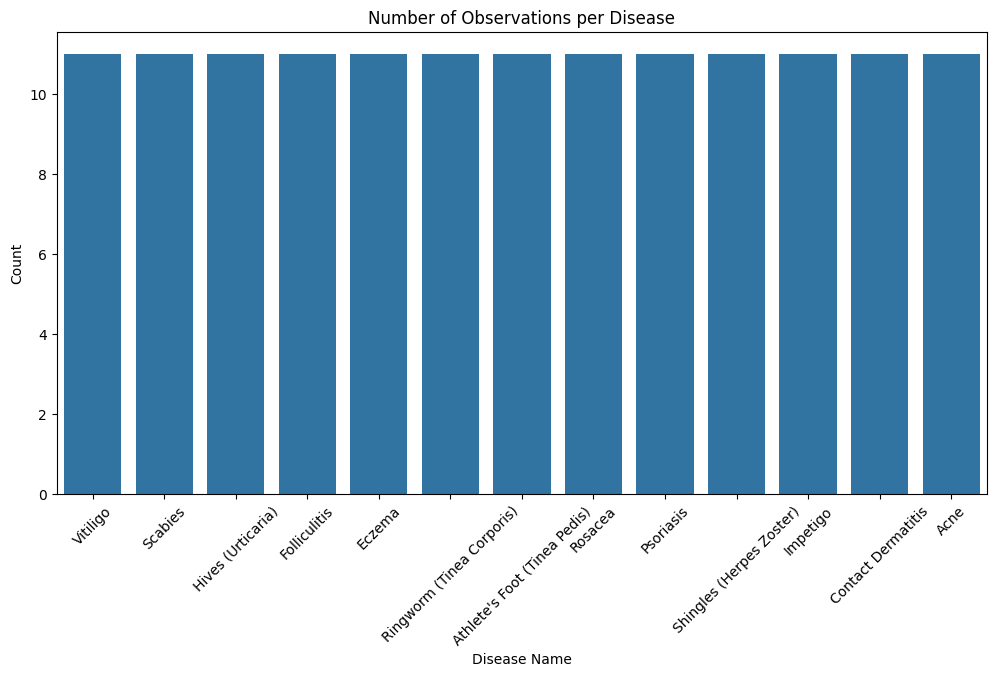

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df1['Disease name'].value_counts().index, y=df['Disease name'].value_counts().values)
plt.title("Number of Observations per Disease")
plt.xlabel("Disease Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [21]:
original_data = pd.read_csv('Skin_text_classifier1.csv')
expanded_data = pd.read_csv('expanded_dataset_no_back_translation.csv')

X_train, X_test, y_train, y_test = train_test_split(
    original_data['Text'], original_data['Disease name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
nb_pipeline = make_pipeline(vectorizer, MultinomialNB())
lr_pipeline = make_pipeline(vectorizer, LogisticRegression(max_iter=1000))

params_nb = {'multinomialnb__alpha': [0.01, 0.1, 1.0, 10.0]}
params_lr = {'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_nb = GridSearchCV(nb_pipeline, params_nb, cv=5, scoring='accuracy')
grid_lr = GridSearchCV(lr_pipeline, params_lr, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

nb_test_score = accuracy_score(y_test, grid_nb.predict(X_test))
lr_test_score = accuracy_score(y_test, grid_lr.predict(X_test))
nb_expanded_score = accuracy_score(expanded_data['Disease name'], grid_nb.predict(expanded_data['Text']))
lr_expanded_score = accuracy_score(expanded_data['Disease name'], grid_lr.predict(expanded_data['Text']))

print("Naive Bayes Accuracy on Original Test Set: {:.2%}".format(nb_test_score))
print("Logistic Regression Accuracy on Original Test Set: {:.2%}".format(lr_test_score))
print("Naive Bayes Accuracy on Expanded Dataset: {:.2%}".format(nb_expanded_score))
print("Logistic Regression Accuracy on Expanded Dataset: {:.2%}".format(lr_expanded_score))


models = ['Naive Bayes', 'Logistic Regression']
scores_original = [nb_test_score, lr_test_score]
scores_expanded = [nb_expanded_score, lr_expanded_score]

Naive Bayes Accuracy on Original Test Set: 100.00%
Logistic Regression Accuracy on Original Test Set: 100.00%
Naive Bayes Accuracy on Expanded Dataset: 98.48%
Logistic Regression Accuracy on Expanded Dataset: 98.37%


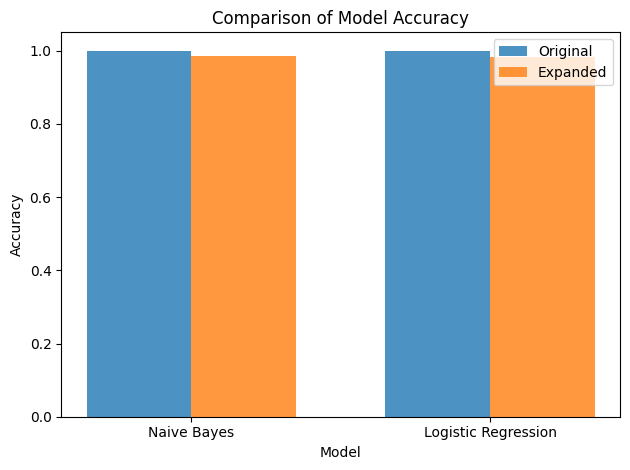

In [22]:
fig, ax = plt.subplots()
index = range(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, scores_original, bar_width, alpha=opacity, label='Original')
rects2 = plt.bar([p + bar_width for p in index], scores_expanded, bar_width, alpha=opacity, label='Expanded')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks([p + bar_width / 2 for p in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_test_seq))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

nn_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_history = nn_model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded),
                          callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_padded, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_padded, y_test_encoded),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 785ms/step - accuracy: 0.0703 - loss: 2.5673 - val_accuracy: 0.2326 - val_loss: 2.5274
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1837 - loss: 2.4988 - val_accuracy: 0.2209 - val_loss: 2.4986
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3490 - loss: 2.3855 - val_accuracy: 0.2791 - val_loss: 2.3793
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4069 - loss: 2.1889 - val_accuracy: 0.4535 - val_loss: 2.1906
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4221 - loss: 1.9788 - val_accuracy: 0.5814 - val_loss: 1.9417
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5472 - loss: 1.6723 - val_accuracy: 0.5698 - val_loss: 1.6432
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6764 - loss: 1.2742 - val_accuracy: 0.6860 - val_loss: 1.3723
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7837 - loss: 0.9206 - val_accuracy: 0.7558 -

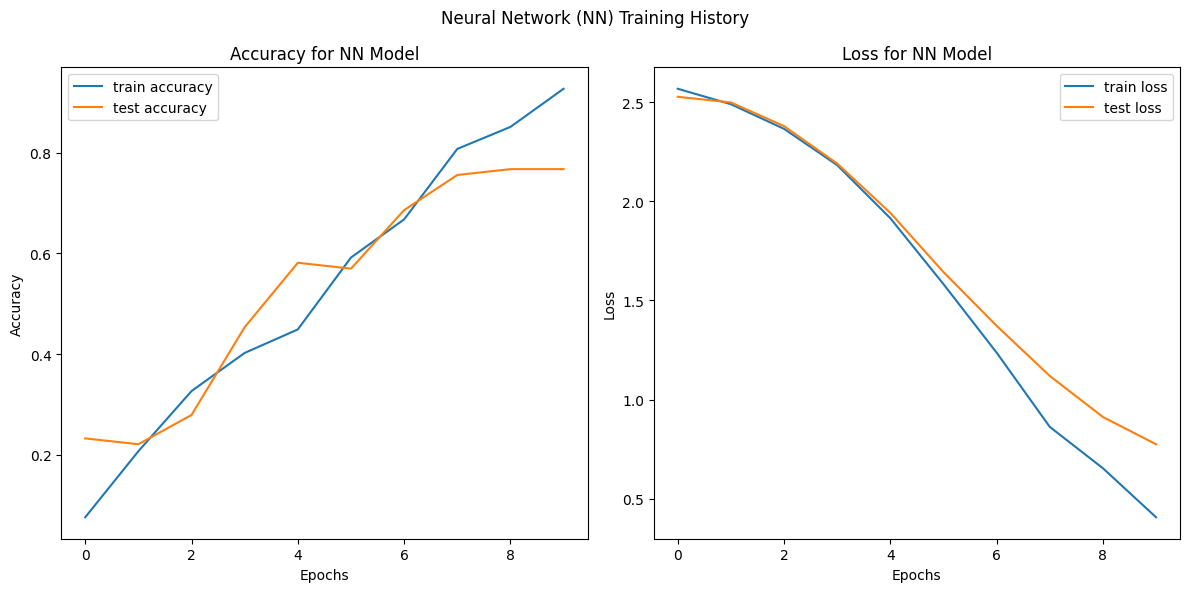

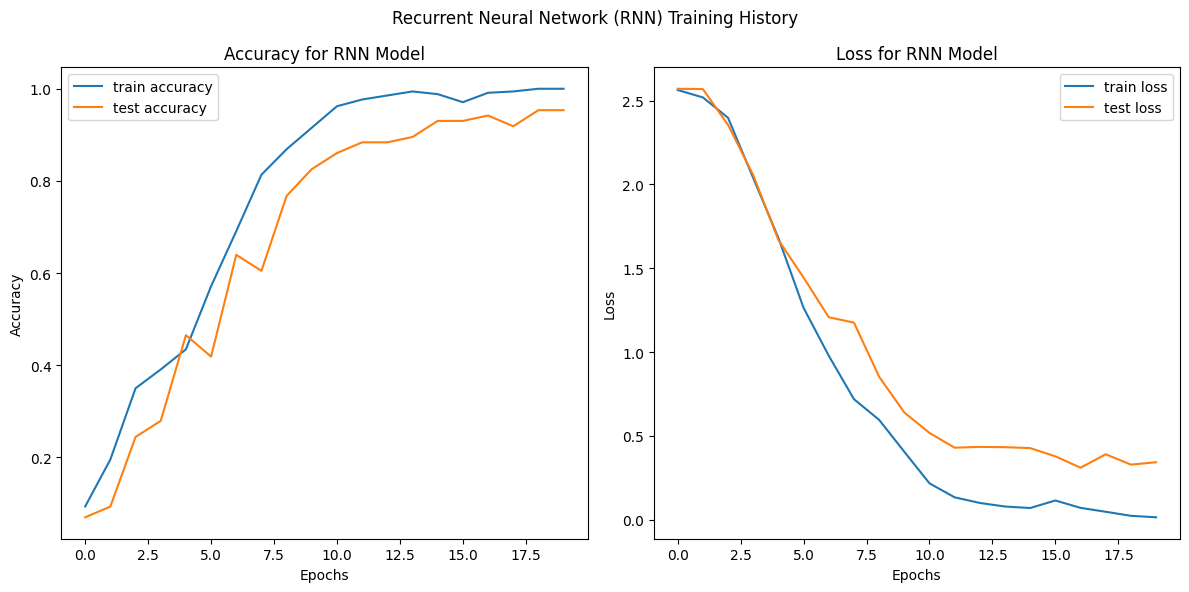

In [24]:
def plot_history(history, title, label):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.title('Accuracy for ' + label)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.title('Loss for ' + label)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_history(nn_history, 'Neural Network (NN) Training History', 'NN Model')
plot_history(rnn_history, 'Recurrent Neural Network (RNN) Training History', 'RNN Model')

In [25]:
nn_test_accuracy = nn_model.evaluate(X_test_padded, y_test_encoded, verbose=0)[1]
rnn_test_accuracy = rnn_model.evaluate(X_test_padded, y_test_encoded, verbose=0)[1]

X_expanded_seq = tokenizer.texts_to_sequences(expanded_data['Text'])
X_expanded_padded = pad_sequences(X_expanded_seq, maxlen=max_length, padding='post')
y_expanded_encoded = label_encoder.transform(expanded_data['Disease name'])


nn_expanded_accuracy = nn_model.evaluate(X_expanded_padded, y_expanded_encoded, verbose=0)[1]
rnn_expanded_accuracy = rnn_model.evaluate(X_expanded_padded, y_expanded_encoded, verbose=0)[1]

print(f"NN Model Accuracy on Original Test Set: {nn_test_accuracy*100:.2f}%")
print(f"RNN Model Accuracy on Original Test Set: {rnn_test_accuracy*100:.2f}%")
print(f"NN Model Accuracy on Expanded Dataset: {nn_expanded_accuracy*100:.2f}%")
print(f"RNN Model Accuracy on Expanded Dataset: {rnn_expanded_accuracy*100:.2f}%")


NN Model Accuracy on Original Test Set: 76.74%
RNN Model Accuracy on Original Test Set: 94.19%
NN Model Accuracy on Expanded Dataset: 69.46%
RNN Model Accuracy on Expanded Dataset: 80.30%


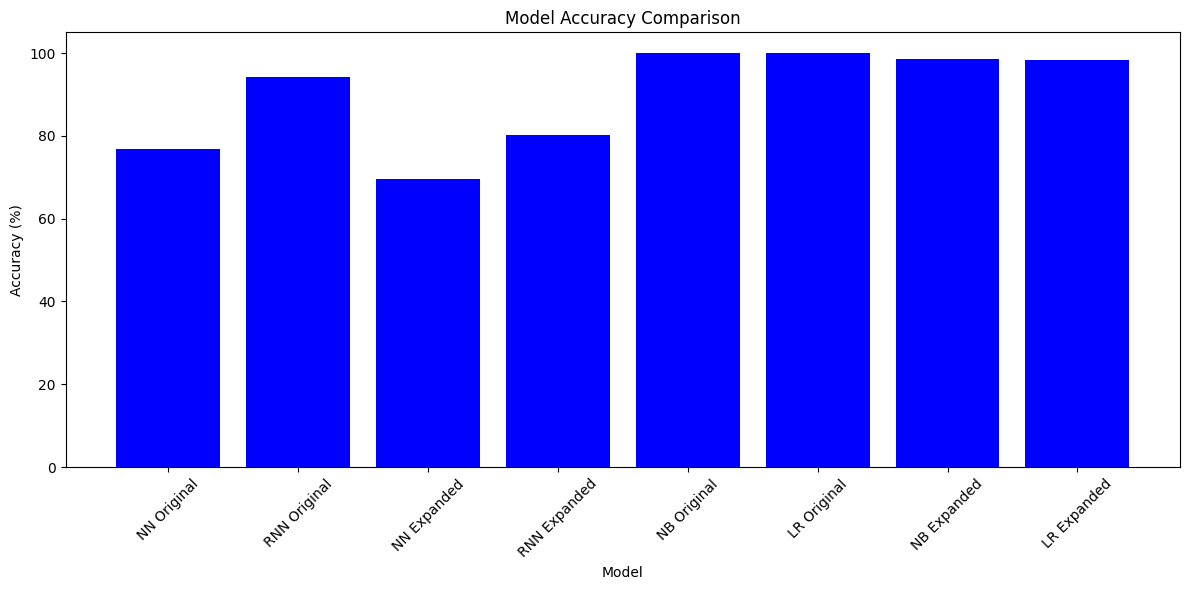

In [26]:
all_model_accuracies = [nn_test_accuracy, rnn_test_accuracy, nn_expanded_accuracy, rnn_expanded_accuracy,
                        nb_test_score, lr_test_score, nb_expanded_score, lr_expanded_score]
labels = ['NN Original', 'RNN Original', 'NN Expanded', 'RNN Expanded', 'NB Original', 'LR Original', 'NB Expanded', 'LR Expanded']

plt.figure(figsize=(12, 6))
plt.bar(range(len(all_model_accuracies)), [acc * 100 for acc in all_model_accuracies], color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(range(len(all_model_accuracies)), labels, rotation=45)
plt.tight_layout()
plt.show()

In [27]:
!pip install transformers datasets tensorflow

In [28]:
!pip install transformers datasets tensorflow
# Import necessary modules
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
from sklearn.metrics import accuracy_score
import numpy as np

In [29]:
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

def tokenize_function(examples):
    return tokenizer(examples['Text'], padding="max_length", truncation=True, max_length=512)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

train_dataset = Dataset.from_pandas(pd.DataFrame({'Text': X_train, 'labels': y_train_encoded}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'Text': X_test, 'labels': y_test_encoded}))

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {'accuracy': accuracy_score(labels, predictions)}

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
results = trainer.evaluate()
print(f"Transformer Model Accuracy: {results['eval_accuracy']*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/343 [00:00<?, ? examples/s]

Map:   0%|          | 0/86 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,2.541300,2.547748,0.116279
2,2.406200,2.383492,0.546512
3,2.213300,2.289553,0.639535


Transformer Model Accuracy: 63.95%


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def zero_shot_classification(file_path):
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)
    dataset = pd.read_csv(file_path)
    texts = dataset['Text'].apply(clean_text).tolist()
    candidate_labels = dataset['Disease name'].unique().tolist()

    correct_predictions = 0
    for text, true_label in zip(texts, dataset['Disease name']):
        result = classifier(text, candidate_labels)
        predicted_label = result['labels'][0]
        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / len(texts)
    return accuracy

file_path1 = '/content/Skin_text_classifier.csv'
file_path2 = '/content/expanded_dataset_no_back_translation.csv'
accuracy1 = zero_shot_classification(file_path1)
accuracy2 = zero_shot_classification(file_path2)

print(f"Zero-shot Classification Accuracy: Dataset 1: {accuracy1*100:.2f}%, Dataset 2: {accuracy2*100:.2f}%")




config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
